**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Martin Alonso Flores Gonzalez

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [94]:
happiness = pd.read_csv('happiness_report.csv' )
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [95]:
mexico = happiness[happiness["Country or region"] == "Mexico"].set_index("Country or region")
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

Text(Country or region
Mexico    6.595
Name: Score, dtype: float64, 0, 'MEX%')

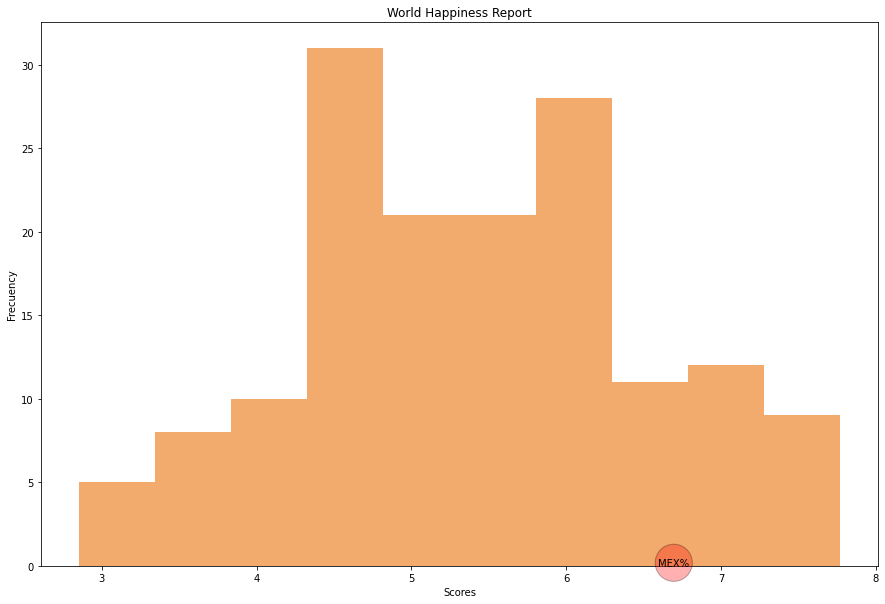

In [96]:
plt.figure(figsize=(15, 10))
props_bbox = {'boxstyle': 'circle',
              'facecolor': 'red',
              'alpha': 0.3}
plt.hist(happiness["Score"], color='#F2AB6D')
plt.title('World Happiness Report')
plt.xlabel('Scores')
plt.ylabel('Frecuency')
plt.text(mexico["Score"], 0,'MEX%',bbox=props_bbox)

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

Text(1.2, 0.85, ' ')

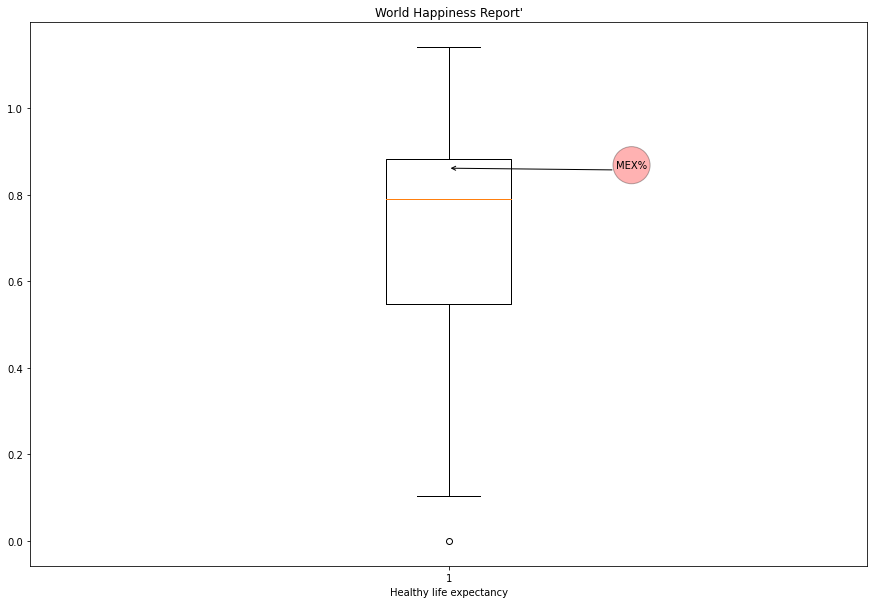

In [97]:
plt.figure(figsize=(15, 10))
plt.boxplot(happiness["Healthy life expectancy"] ) 
plt.xlabel("Healthy life expectancy")
plt.ylabel("")
plt.title("World Happiness Report'")
plt.text(1.2, mexico["Healthy life expectancy"],'MEX%',bbox=props_bbox)
plt.annotate(' ',xy=(1,mexico["Healthy life expectancy"]),xytext=(1.2,0.85),arrowprops=dict(arrowstyle='->'))

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

Text(0.5, 1.0, 'Contribution in Mexico happiness score ')

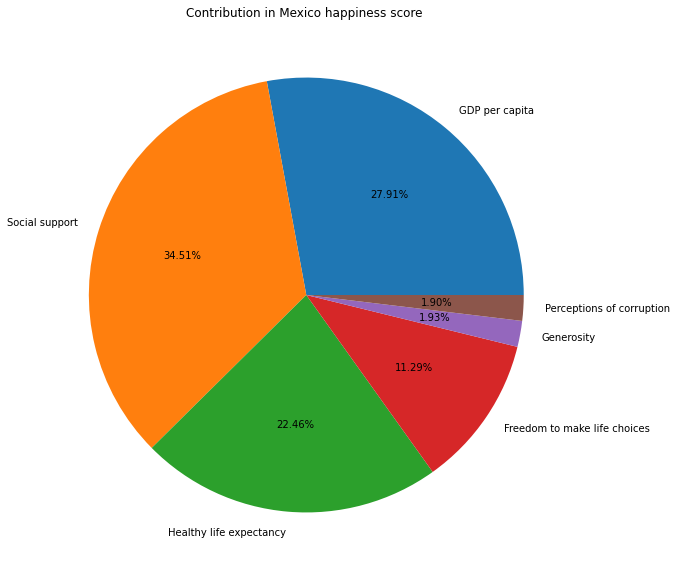

In [98]:
mexico_t = mexico.drop(["Overall rank", "Score"],  axis=1).T
plt.figure(figsize=(15, 10))
plt.pie(mexico_t["Mexico"],labels=mexico_t.index, autopct='%1.2f%%', rotatelabels=False)
plt.title("Contribution in Mexico happiness score ")

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

Text(0, 0.5, '')

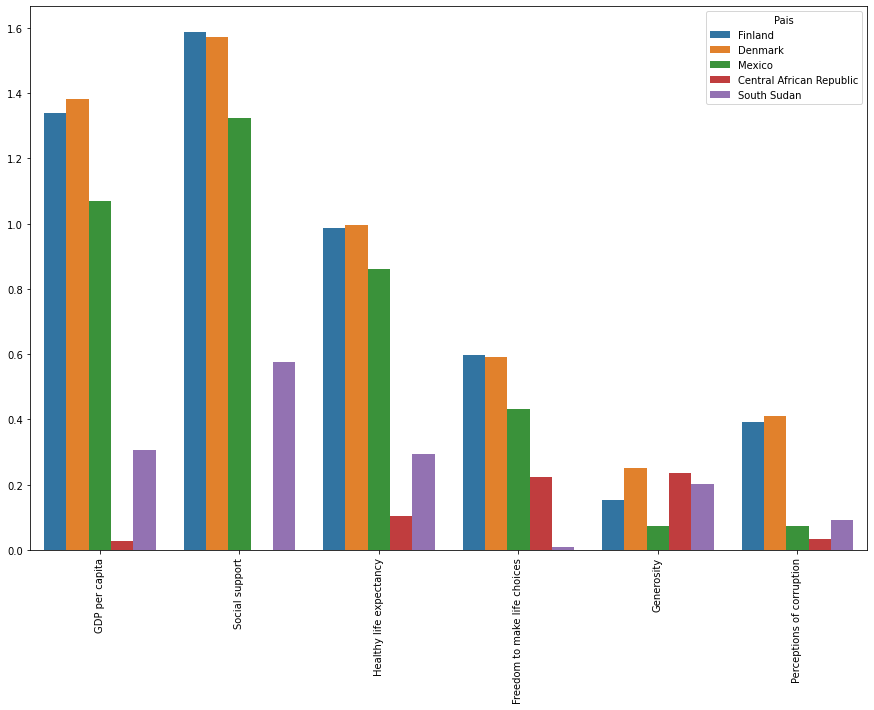

In [99]:

mis_paises = ['Finland', 'Denmark', 'Mexico', 'Central African Republic', 'South Sudan']
rank = [1, 2, 23, 155, 156]
df = pd.DataFrame(columns= ['index', 'Pais', 'Metricas'])
for i in range(0, 5):
  mi_pais = mis_paises[i]
  mi_rank = rank[i]
  pais = happiness[(happiness["Overall rank"] == mi_rank)]
  pais = pais[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].T
  pais['Pais'] = [mi_pais, mi_pais, mi_pais, mi_pais, mi_pais, mi_pais]
  pais['Metricas'] = pais[mi_rank - 1]
  mi_df = pais[['Pais','Metricas' ]].reset_index()
  df = pd.concat([df, mi_df])
  

plt.figure(figsize=(15, 10))
sns.barplot(x="index", y="Metricas", hue="Pais", data=df)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')



8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

Text(0, 0.5, 'Perceptions of corruption')

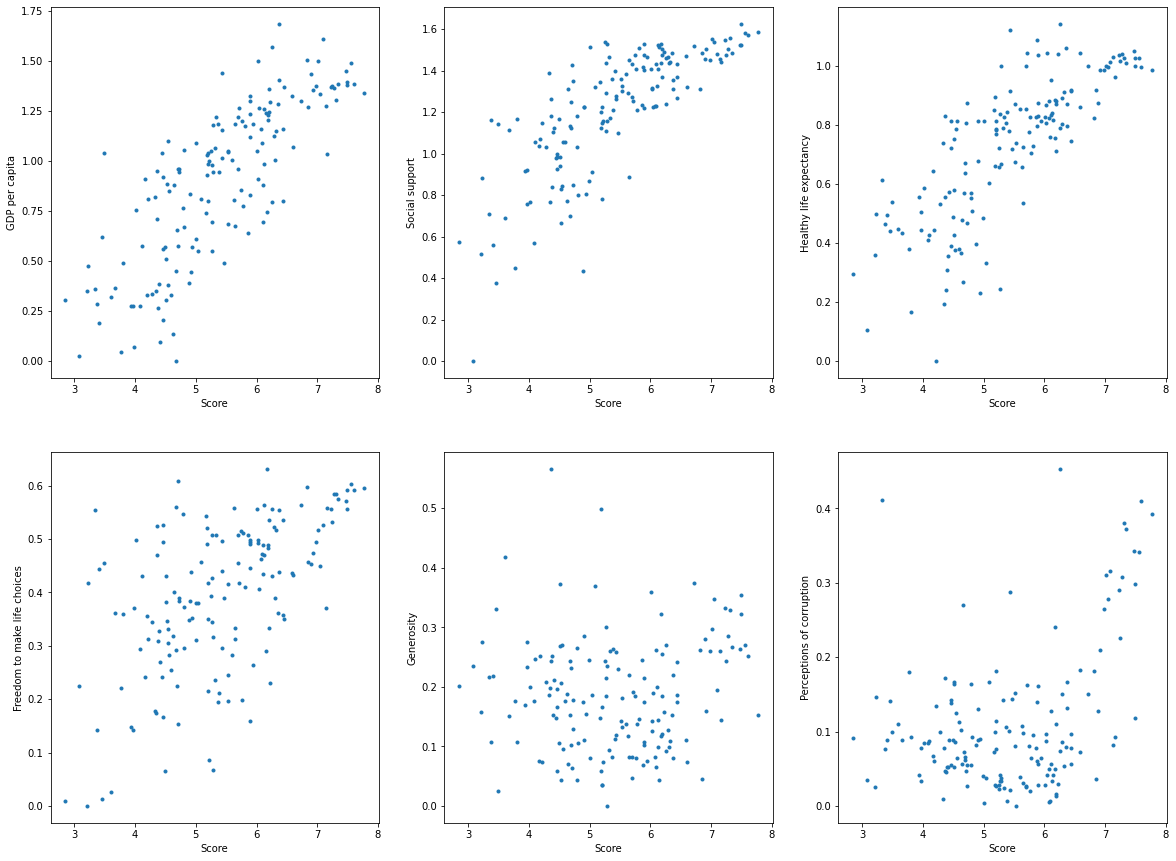

In [100]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
plt.plot(happiness['Score'], happiness['GDP per capita'], '.')
plt.xlabel('Score')
plt.ylabel('GDP per capita')

plt.subplot(2,3,2)
plt.plot(happiness['Score'], happiness['Social support'], '.')
plt.xlabel('Score')
plt.ylabel('Social support')

plt.subplot(2,3,3)
plt.plot(happiness['Score'], happiness['Healthy life expectancy'], '.')
plt.xlabel('Score')
plt.ylabel('Healthy life expectancy')

plt.subplot(2,3,4)
plt.plot(happiness['Score'], happiness['Freedom to make life choices'], '.')
plt.xlabel('Score')
plt.ylabel('Freedom to make life choices')

plt.subplot(2,3,5)
plt.plot(happiness['Score'], happiness['Generosity'], '.')
plt.xlabel('Score')
plt.ylabel('Generosity')

plt.subplot(2,3,6)
plt.plot(happiness['Score'], happiness['Perceptions of corruption'], '.')
plt.xlabel('Score')
plt.ylabel('Perceptions of corruption')


9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

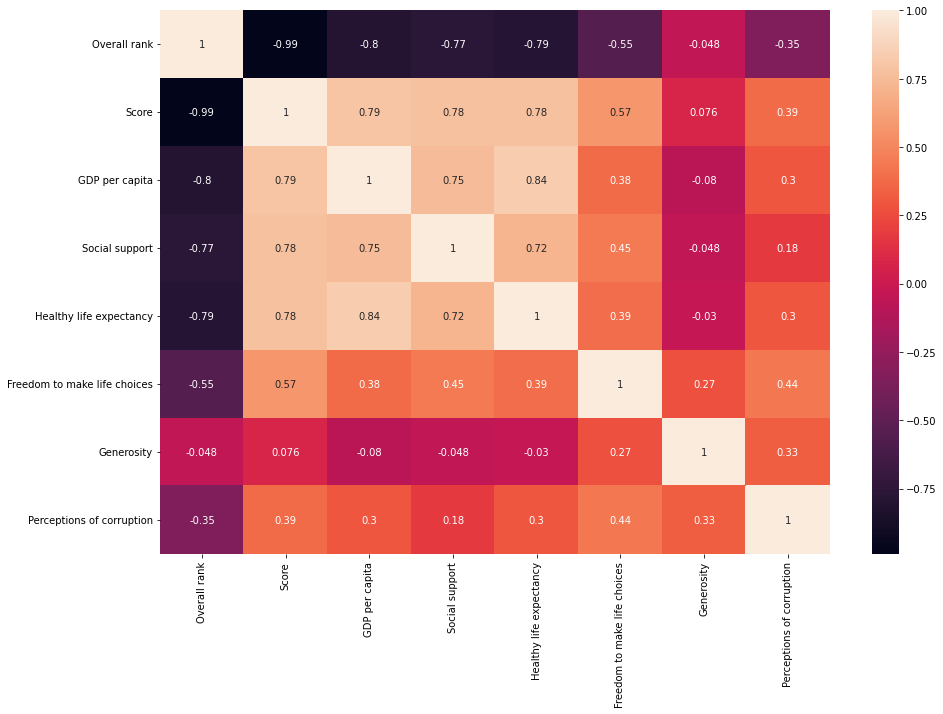

In [101]:
my_happiness = happiness[['Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

plt.figure(figsize=(15, 10))
sns.heatmap(my_happiness.corr(), annot= True)


10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

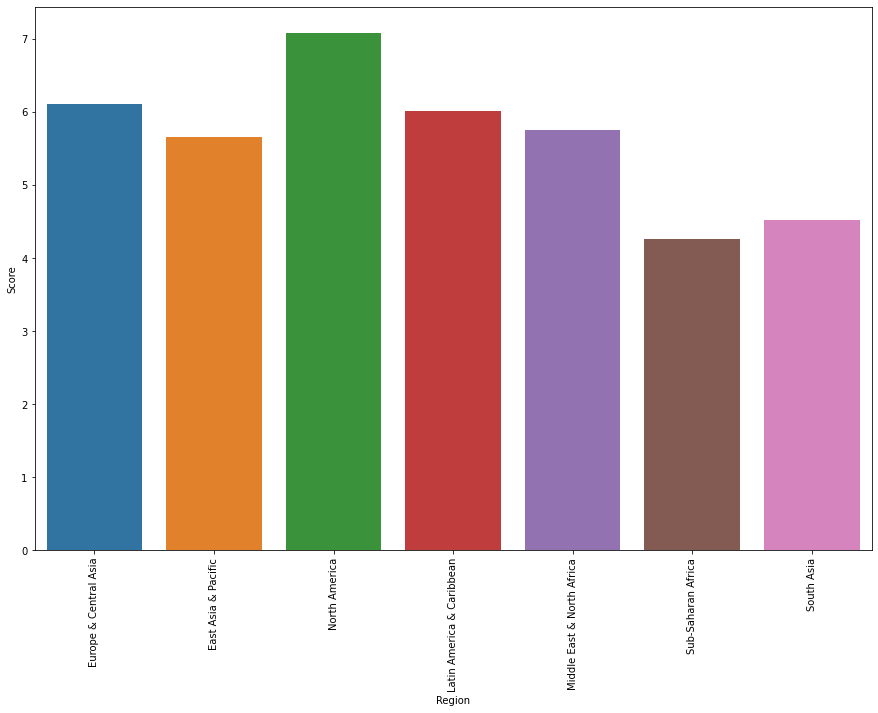

In [102]:
metadata = pd.read_csv('Metadata.csv' )
complete_df = pd.merge(happiness, metadata, how='inner', left_on= 'Country or region', right_on= 'TableName')

plt.figure(figsize=(15, 10))
sns.barplot(x= "Region", y= "Score", data= complete_df, ci=None)
plt.xticks(rotation=90)

